x :  [1 1 4 2]
X :  [ 8.+0.j -3.+1.j  2.+0.j -3.-1.j]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


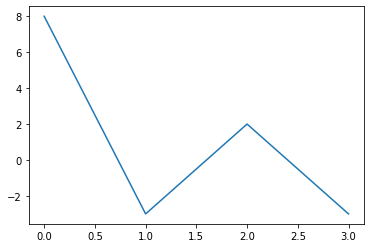

In [ ]:
import numpy as np
from numpy.fft import fft

x = np.array([1, 1, 4, 2])
X = fft(x)

print("x : ", x)
print("X : ", X)

plt.plot(X)

Mounted at /content/drive


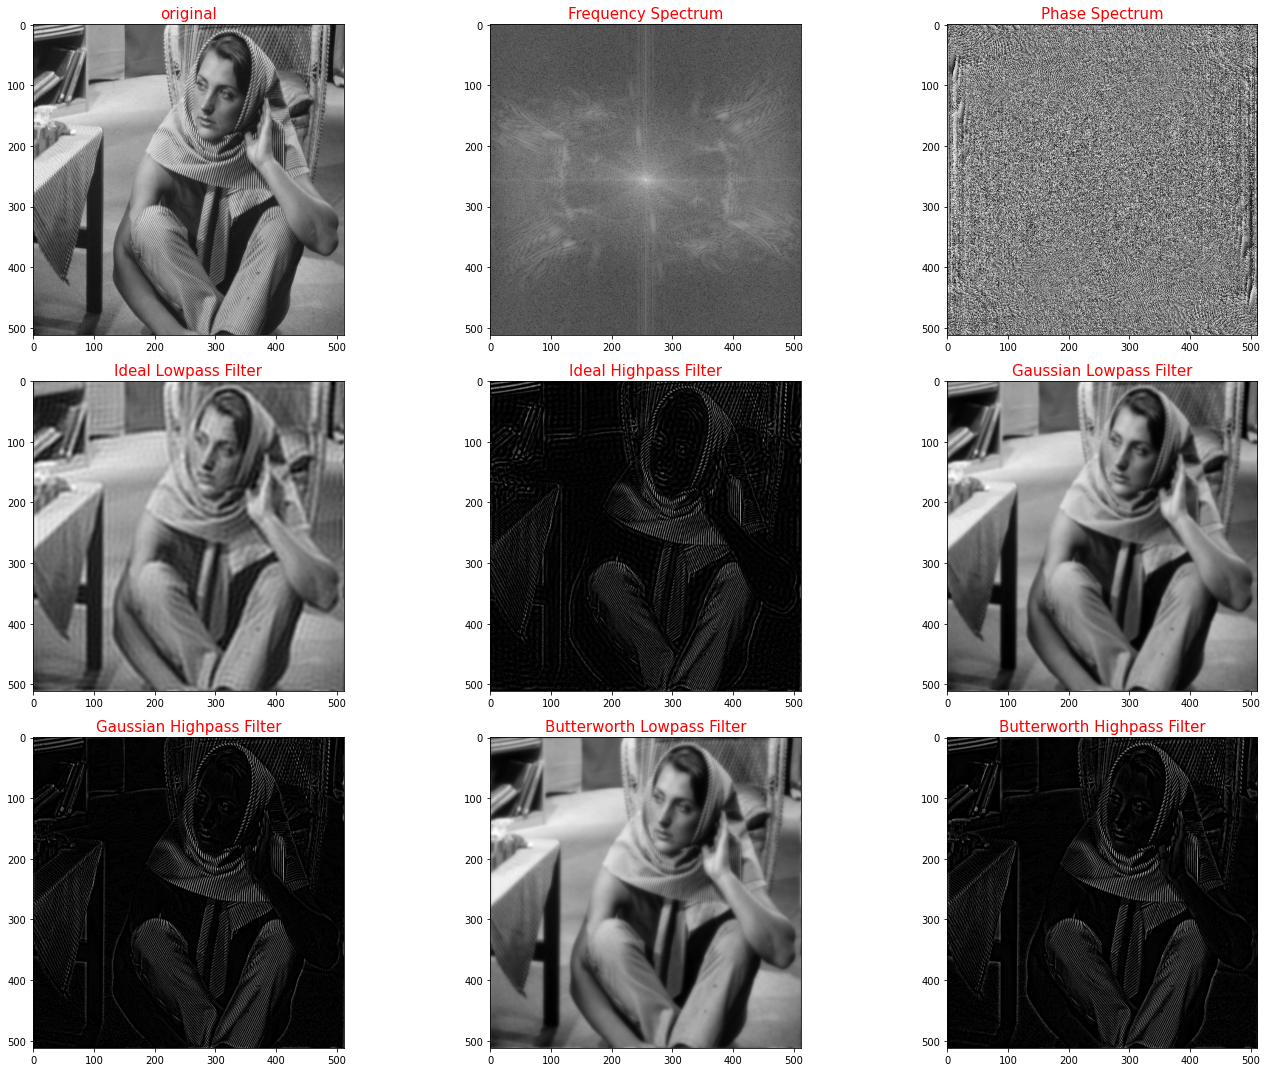

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
from numpy.fft import fft2, ifft2, fftshift

drive.mount('/content/drive')
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/Barbara.bmp", -1)

def frequency_spectrum( f ):                     #頻率頻譜
	F = fft2( f )
	Fshift = fftshift( F )
	mag = 20 * np.log( np.abs( Fshift ) + 1 )
	mag = mag / mag.max( ) * 255.0
	g = np.uint8( mag )
	return g

def phase_spectrum( f ):                       #相位頻譜
	F = fft2( f )
	phase = np.angle( F, deg = True )
	nr, nc = phase.shape[:2]
	for x in range( nr ):
		for y in range( nc ):
			if phase[x,y] < 0:
				phase[x,y] = phase[x,y] + 360
			phase[x,y] = int( phase[x,y] * 255 / 360 )
	g = np.uint8( np.clip( phase, 0, 255 ) )
	return g

def frequency_filtering( f, filter, D0, order ):
	nr, nc = f.shape[:2]	

	fp = np.zeros( [ nr, nc ] )				   # 前處理
	for x in range( nr ):
		for y in range( nc ):
			fp[x,y] = pow( -1, x + y ) * f[x,y]
	
	F = fft2( fp )						  # 離散傅立葉轉換
	G = F.copy( )
	
	if filter == 1:						   # 理想低通濾波器
		for u in range( nr ):
			for v in range( nc ):
				dist = np.sqrt( ( u - nr / 2 ) * ( u - nr / 2 ) +
				                ( v - nc / 2 ) * ( v - nc / 2 ) )
				if dist > D0:
					G[u,v] = 0
					
	elif filter == 2:						# 理想高通濾波器
		for u in range( nr ):
			for v in range( nc ):
				dist = np.sqrt( ( u - nr / 2 ) * ( u - nr / 2 ) +
				                ( v - nc / 2 ) * ( v - nc / 2 ) )
				if dist <= D0:
					G[u,v] = 0

	elif filter == 3:						# 高斯低通濾波器
		for u in range( nr ):
			for v in range( nc ):
				dist = np.sqrt( ( u - nr / 2 ) * ( u - nr / 2 ) +
				                ( v - nc / 2 ) * ( v - nc / 2 ) )
				H = np.exp( -( dist * dist ) / ( 2 * D0 * D0 ) )
				G[u,v] *= H	
	
	elif filter == 4:						# 高斯低通濾波器
		for u in range( nr ):
			for v in range( nc ):
				dist = np.sqrt( ( u - nr / 2 ) * ( u - nr / 2 ) +
				                ( v - nc / 2 ) * ( v - nc / 2 ) )
				H = 1 - np.exp( -( dist * dist ) / ( 2 * D0 * D0 ) )
				G[u,v] *= H
					
	elif filter == 5:						# 巴特沃斯低通濾波器
		for u in range( nr ):
			for v in range( nc ):
				dist = np.sqrt( ( u - nr / 2 ) * ( u - nr / 2 ) +
				                ( v - nc / 2 ) * ( v - nc / 2 ) )
				H = 1.0 / ( 1.0 + pow( dist / D0, 2 * order ) )
				G[u,v] *= H
				
	elif filter == 6:						# 巴特沃斯高通濾波器
		for u in range( nr ):
			for v in range( nc ):
				dist = np.sqrt( ( u - nr / 2 ) * ( u - nr / 2 ) +
				                ( v - nc / 2 ) * ( v - nc / 2 ) )
				H = 1.0 - 1.0 / ( 1.0 + pow( dist / D0, 2 * order ) )
				G[u,v] *= H
					
	gp = ifft2( G )						   # 反離散傅立葉轉換

	gp2 = np.zeros( [ nr, nc ] )			   # 後處理
	for x in range( nr ):
		for y in range( nc ):
			gp2[x,y] = round( pow( -1, x + y ) * np.real( gp[x,y] ), 0 )
	g = np.uint8( np.clip( gp2, 0, 255 ) )

	return g


img1 = frequency_spectrum(img)
img2 = phase_spectrum(img)
img3 = frequency_filtering( img, 1, 50, 1 )
img4 = frequency_filtering( img, 2, 50, 1 )
img5 = frequency_filtering( img, 3, 50, 1 )
img6 = frequency_filtering( img, 4, 50, 1 )
img7 = frequency_filtering( img, 5, 50, 1 )
img8 = frequency_filtering( img, 6, 50, 1 )

titles = ['original', 'Frequency Spectrum', 'Phase Spectrum', 'Ideal Lowpass Filter', 'Ideal Highpass Filter', \
    'Gaussian Lowpass Filter', 'Gaussian Highpass Filter', 'Butterworth Lowpass Filter', 'Butterworth Highpass Filter']
images = [img, img1, img2, img3, img4, img5, img6, img7, img8]

plt.figure(figsize=(20, 15))

for i in range(9):
    plt.subplot(3, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize = 15, color = 'r')

plt.tight_layout()
plt.show()